# Yolo Object Detection.

### import some libraries

In [43]:
import cv2
import os
import numpy as np
import time
import glob
import matplotlib.pyplot as plt

### load yolo weights and cfg

In [44]:
cfg_path = os.path.join("yolo","yolov3.cfg.txt")
weight_path = os.path.join("yolo","yolov3.weights")

### load the neural net in cv2

In [45]:
net = cv2.dnn.readNetFromDarknet(cfg_path,weight_path)

### get Layers Names

In [46]:
names =net.getLayerNames()


### load the test video

In [47]:
# Importing all necessary libraries
import cv2
import os

# Read the video from specified path
cam = cv2.VideoCapture("lane-only/project_l_e.avi")

try:
	
	# creating a folder named data
	if not os.path.exists('data12'):
		os.makedirs('data12')

# if not created then raise error
except OSError:
	print ('Error: Creating directory of data')

# frame
currentframe = 0

while(True):
	
	# reading from frame
	ret,frame = cam.read()

	if ret:
		# if video is still left continue creating images
		name = './data12/frame' + str(currentframe) + '.jpg'


		# writing the extracted images
		cv2.imwrite(name, frame)

		# increasing counter so that it will
		# show how many frames are created
		currentframe += 1
	else:
		break
        

# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()


In [48]:
Frames = []
for i in range(0,currentframe,5):
    img = cv2.imread("data12/frame"+ ""+str(i)+".jpg")
    img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    height, width, layers = img.shape
    size = (width,height)
    Frames.append(img)

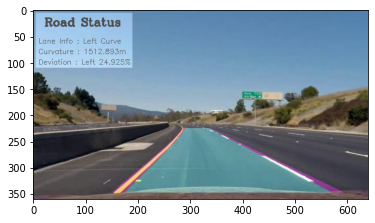

In [49]:
plt.imshow(Frames[3])

In [50]:
(H,W)=Frames[20].shape[:2]
layers_names =[names[i[0]-1] for i in net.getUnconnectedOutLayers()]
layers_names

['yolo_82', 'yolo_94', 'yolo_106']

### run the interface on the test image

In [51]:
for j in range(len(Frames)):
    boxes =[]
    confidences=[]
    classIDs=[]
    
    
    
    blob = cv2.dnn.blobFromImage(Frames[j], 1/255.0, (416,416), crop=False, swapRB=False)
    net.setInput(blob)

    #cal the time of our algo:
    start_t =time.time()
    layers_output =net.forward(layers_names)
    
    for output in layers_output:
        for dection in output:
            scores = dection[5:]
            classID =np.argmax(scores)
            confidence=scores[classID]

            if confidence> 0.85 :
                box = dection[:4] * np.array([W,H,W,H])
                bx,by,bw,bh= box.astype("int")

                x=int(bx-(bw/2))
                y=int(by-(bh/2))


                boxes.append([x,y,int(bw),int(bh)])
                confidences.append(float(confidence))
                classIDs.append(classID)
                
                
    idxs =cv2.dnn.NMSBoxes(boxes,confidences,0.8,0.8)
    labels_path = os.path.join("yolo","coco.names.txt")
    labels=open (labels_path).read().strip().split("\n")
    #labels=np.array(labels)
    #labels=labels[:8]
    
    #plot the bounding boxes in the image:
    if len(idxs) > 0:
    
        for i in idxs.flatten():
            (x,y)=[boxes[i][0],boxes[i][1]]
            (w,h)=[boxes[i][2],boxes[i][3]]
            


            cv2.rectangle(Frames[j],(x,y),(x+w,y+h),(0,255,255),2)
            cv2.putText(Frames[j],"{}"":" "{}".format(labels[classIDs[i]],confidences[i]),(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,139,139),2)


    

    



In [52]:
cv2.imshow("image",cv2.cvtColor(Frames[50],cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

-1

### print output video

In [53]:
import os
if not os.path.exists("data13"):
    os.makedirs('data13')
for i in range(len(Frames)):
    Frames[i]= cv2.cvtColor(Frames[i],cv2.COLOR_BGR2RGB)
    name = './data13/frame'+ ""+str(i)+ '.jpg'
    cv2.imwrite(name,Frames[i])

In [54]:
import cv2
import numpy as np
import glob

img_array = []
i = 0
#for filename in glob.glob("data5/frame"+ ""+str(i)+".jpg"):
for i in range(len(Frames)):
    img = cv2.imread("data13/frame"+ ""+str(i)+".jpg")
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('project_e_m.avi',cv2.VideoWriter_fourcc(*'DIVX'), 5 , size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()